# Finding Number of Parks in Neighborhoods 
### Kenny Han

We want the best neighborhood in Pittsburgh for talking a walk. My metric is the number of parks for each neighborhood. Parks are the best place to take some walks!

### DO NOT RUN THESE IF GRADER, THESE WERE FOR TESTING GO DOWN TO WHERE IT SAYS "RUN"

In [2]:

import pandas as pd
try:
    import geopy
    print("Geopy is already installed.")
except ImportError:
    print("Geopy is not installed. Installing...")
    !pip install geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

Geopy is already installed.


In [4]:

input_file = 'data/park_features.csv'  
df = pd.read_csv(input_file)

df.head()

,_id,objectid,unicode,name,facility_type,type_code,center,center_code,feature_name,website,...,outlet_power,outlet_telephone,pet_friendly,port_a_john_near,smoking_not_permitted,smoking_permitted,x,y,x2,y2
0,6535,1664,NaN,Four Seasons Activity Center,Building,10.0,Boyce Park,BP,Four Seasons Activity Center,https://www.alleghenycounty.us/parks/boyce/fou...,...,Yes,No,No,No,No,No,-79.444865,40.274144,1.412912e+06,417262.772025
1,6536,1665,NaN,Picnic Hut,Building,10.0,Boyce Park,BP,Picnic Hut,https://www.alleghenycounty.us/parks/boyce/pic...,...,Yes,No,No,No,No,No,-79.445743,40.273024,1.412208e+06,416145.412055
2,6537,1666,NaN,Basketball Courts,Court - Basketball,31.0,Boyce Park,BP,Basketball Courts,https://www.alleghenycounty.us/parks/activitie...,...,No,No,No,No,No,No,-79.440789,40.283353,1.416179e+06,422461.928293
3,6538,1667,NaN,Tennis Courts,Court - Tennis,32.0,Boyce Park,BP,Tennis Courts,https://www.alleghenycounty.us/parks/activitie...,...,No,No,No,No,No,No,-79.441516,40.282931,1.415608e+06,422047.060685
4,6539,1668,NaN,Off Leash Dog Park 2,Dog Park,61.0,Boyce Park,BP,Off Leash Dog Park 2,NaN,...,No,No,No,No,No,No,-79.440645,40.282624,1.416275e+06,421721.243095


In [17]:
api_key = '' 

def get_neighborhood_google_maps(lat, lon, api_key):
    url = f"https://maps.googleapis.com/maps/api/geocode/json?latlng={lat},{lon}&key={api_key}"
    response = requests.get(url)
    data = response.json()
    if data['status'] == 'OK':
        for component in data['results'][0]['address_components']:
            if 'neighborhood' in component['types']:
                return component['long_name']
            elif 'sublocality' in component['types']:
                return component['long_name']
            elif 'locality' in component['types']:
                return component['long_name']
        return data['results'][0]['formatted_address']
    else:
        return None 


In [19]:
import time
neighborhoods = []
for index, row in df.iterrows():
    latitude = row['y'] 
    longitude = row['x']  
    
    neighborhood = get_neighborhood_google_maps(latitude, longitude, api_key)
    neighborhoods.append(neighborhood)
    
    print(f"Processed row {index + 1}/{len(df)}: Neighborhood - {neighborhood}")
    time.sleep(1)


Processed row 1/563: Neighborhood - Mount Pleasant
Processed row 2/563: Neighborhood - Latrobe
Processed row 3/563: Neighborhood - Lawson Heights
Processed row 4/563: Neighborhood - Lawson Heights
Processed row 5/563: Neighborhood - Lawson Heights
Processed row 6/563: Neighborhood - Lawson Heights
Processed row 7/563: Neighborhood - Lawson Heights
Processed row 8/563: Neighborhood - Latrobe
Processed row 9/563: Neighborhood - Greensburg
Processed row 10/563: Neighborhood - Greensburg
Processed row 11/563: Neighborhood - Latrobe
Processed row 12/563: Neighborhood - Latrobe
Processed row 13/563: Neighborhood - Greensburg
Processed row 14/563: Neighborhood - Greensburg
Processed row 15/563: Neighborhood - Greensburg
Processed row 16/563: Neighborhood - Lawson Heights
Processed row 17/563: Neighborhood - Lawson Heights
Processed row 18/563: Neighborhood - Lawson Heights
Processed row 19/563: Neighborhood - Greensburg
Processed row 20/563: Neighborhood - Whitney
Processed row 21/563: Neighb

KeyboardInterrupt: 

In [31]:
input_file = 'pitt_parks.csv' 
output_file = 'output_with_neighborhoods.csv'
df = pd.read_csv(input_file)

url = "https://services1.arcgis.com/YZCmUqbcsUpOKfj7/arcgis/rest/services/PGHWebNeighborhoods/FeatureServer/0/query"

def get_neighborhood(lat, lon):
    params = {
        "geometry": f"{lon},{lat}",    
        "geometryType": "esriGeometryPoint",
        "inSR": "4326",               
        "spatialRel": "esriSpatialRelIntersects",
        "outFields": "hood",           
        "f": "json"                    
    }
    
    response = requests.get(url, params=params)
    data = response.json()
    
    if 'features' in data and len(data['features']) > 0:
        return data['features'][0]['attributes']['hood']
    else:
        return None  


In [32]:
neighborhoods = []
for index, row in df.iterrows():
    latitude = row['y']  
    longitude = row['x']  
    print(latitude, longitude)
    
    neighborhood = get_neighborhood(latitude, longitude)
    neighborhoods.append(neighborhood)
    
    print(f"Processed row {index + 1}/{len(df)}: Neighborhood - {neighborhood}")
    time.sleep(1) 


40.274143990912 -79.444864783405
Processed row 1/563: Neighborhood - None
40.273024359826 -79.445742921924
Processed row 2/563: Neighborhood - None
40.283353259971 -79.440789497984
Processed row 3/563: Neighborhood - None
40.282930702666 -79.441516139299
Processed row 4/563: Neighborhood - None
40.282623619005 -79.440644844835
Processed row 5/563: Neighborhood - None
40.283083947622 -79.440724547083
Processed row 6/563: Neighborhood - None
40.283053640665 -79.441160212993
Processed row 7/563: Neighborhood - None
40.272617837049 -79.444647461295
Processed row 8/563: Neighborhood - None
40.282614731212 -79.445225148889
Processed row 9/563: Neighborhood - None
40.283136700181 -79.445050905206
Processed row 10/563: Neighborhood - None
40.271027053958 -79.442710290341
Processed row 11/563: Neighborhood - None
40.272821670439 -79.444457602833
Processed row 12/563: Neighborhood - None
40.281008875072 -79.450913071992
Processed row 13/563: Neighborhood - None
40.280213845973 -79.450903055399
P

# RUN 
### START RUNNING HERE FOR INDIVIDUAL METRIC FOR NUMBER OF PARKS

In [2]:
import geopandas as gpd
from shapely.geometry import Point

neighborhoods = gpd.read_file('data/neighborhoods.geojson')  
parks = gpd.read_file('data/parks.geojson')  


/opt/anaconda3/envs/cmpinf0010/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/opt/anaconda3/envs/cmpinf0010/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/opt/anaconda3/envs/cmpinf0010/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/opt/anaconda3/envs/cmpinf0010/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='

In [3]:
if 'geometry' not in parks.columns:
    parks['geometry'] = parks.apply(lambda row: Point(float(row['longitude']), float(row['latitude'])), axis=1)
    parks = gpd.GeoDataFrame(parks, geometry='geometry', crs="EPSG:4326")  #

In [4]:
parks = parks.to_crs(neighborhoods.crs)

parks_with_neighborhoods = gpd.sjoin(parks, neighborhoods, how="left", op="within")
park_counts = parks_with_neighborhoods.groupby('hood').size().reset_index(name='park_count')

print(parks_with_neighborhoods[['origpkname', 'hood']].head())


          origpkname                hood
0  Cliffside Parklet    Crawford-Roberts
1        Young Field  Marshall-Shadeland
2       Revenue Park       New Homestead
3    Friendship Park          Bloomfield
4   Heths Playground                 NaN


/opt/anaconda3/envs/cmpinf0010/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [ ]:
parks_with_neighborhoods.to_file("parks_with_neighborhoods.geojson", driver="GeoJSON")
parks_with_neighborhoods[['origpkname', 'hood']].to_csv("parks_with_neighborhoods.csv", index=False)

In [6]:
all_neighborhoods = neighborhoods[['hood']]

park_counts_full = all_neighborhoods.merge(park_counts, on='hood', how='left').fillna({'park_count': 0})
park_counts_sorted = park_counts_full.sort_values(by='park_count', ascending=False).reset_index(drop=True)
park_counts_sorted.rename(columns={'hood': 'neighborhood' , 'park_count': 'count'}, inplace=True)
file_path = "final_metrics/sorted_park_counts_by_neighborhood.csv"
park_counts_sorted.to_csv(file_path, index=False)

print(park_counts_sorted)
print(f"park counts by neighborhood saved to {file_path}")


                 neighborhood  count
0                East Liberty    9.0
1   Central Business District    7.0
2                   Beechview    7.0
3           South Side Slopes    7.0
4               South Oakland    6.0
..                        ...    ...
85                North Shore    0.0
86                 Friendship    0.0
87                  Overbrook    0.0
88              Highland Park    0.0
89          Northview Heights    0.0

[90 rows x 2 columns]
park counts by neighborhood saved to final_metrics/sorted_park_counts_by_neighborhood.csv


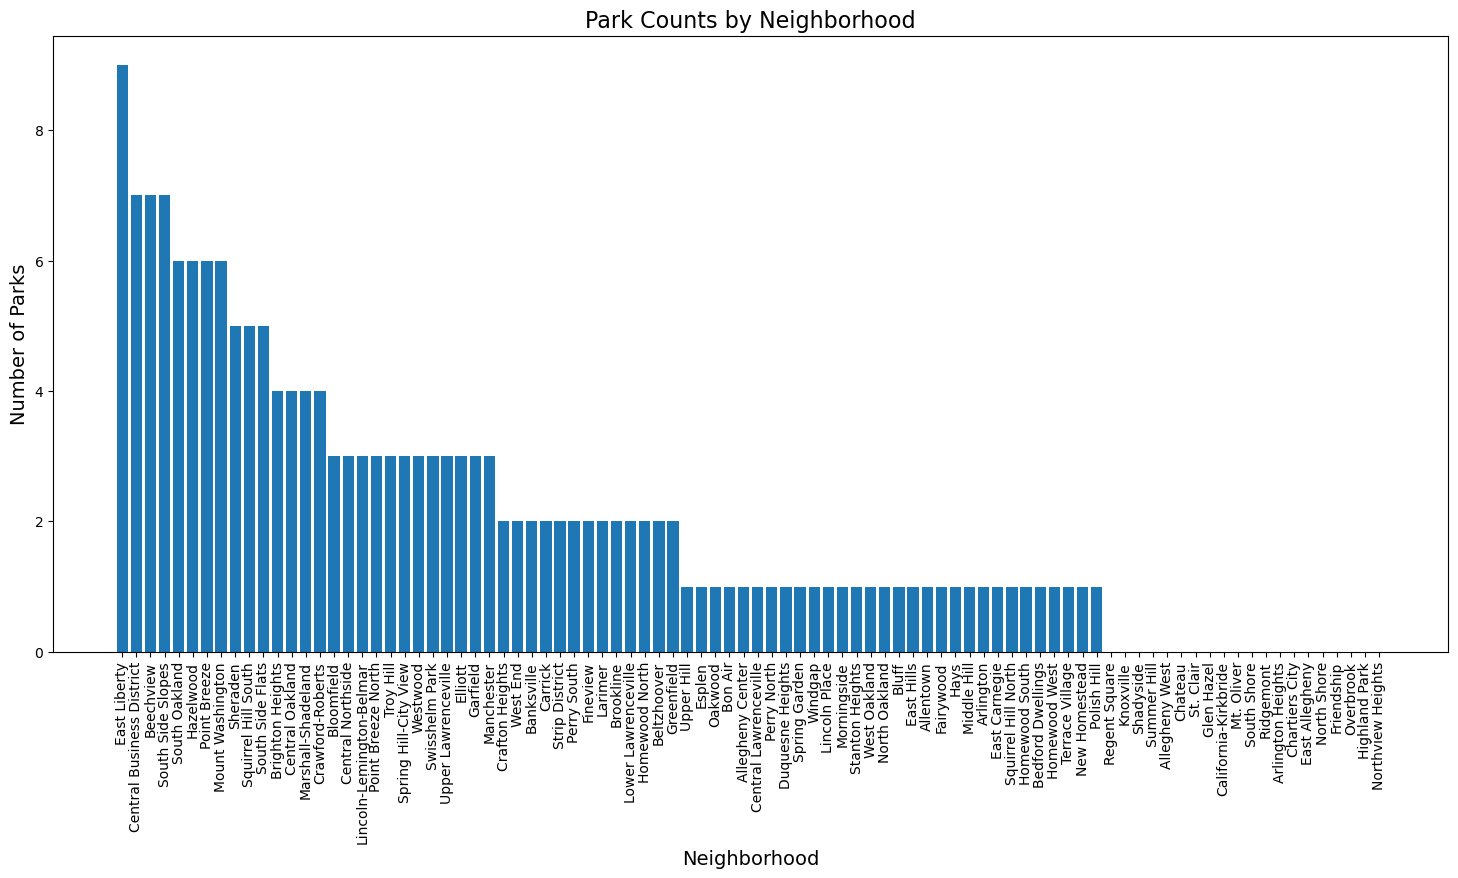

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plt.bar(park_counts_sorted['neighborhood'], park_counts_sorted['count'])
plt.title('Park Counts by Neighborhood', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Number of Parks', fontsize=14)
plt.xticks(rotation=90)

plt.show()


### Conculsion 
The neighborhood with the most parks is East Liberty with 9 parks. There seems to be a steep drop off from the top neighborhoods and levels off with neighborhoods with 1 and no parks. The neighborhoods with the most parks are close to each other, I think what is happening is that the locations with the most parks are shared by multiple neighborhoods.